<a href="https://colab.research.google.com/github/AswinKrishnan2125/FastText-Embedding/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Preprocess the dataset to ensure one sentence per line
input_file = "newcorp.txt"  # Your original dataset
output_file = "malayalam_dataset_processed.txt"  # Processed dataset

with open(input_file, "r", encoding="utf-8") as infile, open(output_file, "w", encoding="utf-8") as outfile:
    for line in infile:
        # Split the line into sentences (assuming sentences are separated by periods)
        sentences = line.strip().split(".")  # Malayalam full stop
        for sentence in sentences:
            if sentence.strip():  # Skip empty sentences
                outfile.write(sentence.strip() + "\n")  # Write each sentence on a new line

print(f"Processed dataset saved to {output_file}")

FileNotFoundError: [Errno 2] No such file or directory: 'newcorp.txt'

In [ ]:
!pip install fasttext

# Step 2: Import Libraries
import fasttext
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Step 3: Upload Your Dataset
# from google.colab import files
# uploaded = files.upload()

# Save the uploaded file to the current directory
dataset_filename ='newcorp.txt'
# print(f"Uploaded dataset: {dataset_filename}")

# Step 4: Preprocess the Dataset (if needed)
# Ensure your dataset is a text file with one sentence per line.
# Example:
# മലയാള സാഹിത്യത്തിലെ ശ്രദ്ധേയരായ ചെറുകഥ എഴുത്തുകാരിൽ ഒരാളാണ് ഷാഹിന ഇ കെ.
# പുതുമഴ ചൂരുള്ള ചുംബനങ്ങൾ എന്ന കൃതിക്കാണ് പുരസ്കാരം ലഭിച്ചത്.

# Step 5: Train the FastText Model
# Parameters:
# - input: Path to the dataset
# - model: 'skipgram' or 'cbow' (skipgram is better for semantic relationships)
# - lr: Learning rate
# - dim: Dimension of word vectors
# - ws: Size of the context window
# - minCount: Minimum number of word occurrences
# - epoch: Number of training epochs
# - wordNgrams: Use n-grams for word representations (useful for capturing subword information)

model = fasttext.train_unsupervised(
    input=dataset_filename,
    model='skipgram',  # Use 'skipgram' for better semantic relationships
    lr=0.05,           # Learning rate
    dim=100,           # Dimension of word vectors
    ws=5,              # Context window size
    minCount=5,        # Ignore words with fewer than 5 occurrences
    epoch=50,          # Number of epochs
    wordNgrams=2       # Use bigrams for subword information
)

# Step 6: Save the Model
# Save the trained model
model.save_model("malayalam_fasttext_model.bin")
print("Model saved as 'malayalam_fasttext_model.bin'")

# model.save_model("malayalam_fasttext_model.bin")
# print("Model saved as 'malayalam_fasttext_model.bin'")

# Step 7: Load the Model (Optional)
# model = fasttext.load_model("malayalam_fasttext_model.bin")

# Step 8: Test Semantic Relationships
# Example 1: Find similar words
word = "സാഹിത്യം"  # Replace with any Malayalam word
similar_words = model.get_nearest_neighbors(word)
print(f"Words similar to '{word}':")
for similarity, similar_word in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313472 sha256=03d892845d104dd5809a81a0c034e1e29a800c5c8981eafd21248a7c7340494a
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
#Dictionary creation

import fasttext

# Load the trained model
model = fasttext.load_model("malayalam_fasttext_model.bin")

# Define the output file
output_file = "word_vectors.txt"

# Open the file in write mode
with open(output_file, "w", encoding="utf-8") as f:
    for word in model.get_words():
        vector = model.get_word_vector(word)
        vector_str = " ".join(map(str, vector))  # Convert vector to space-separated string
        f.write(f"{word} {vector_str}\n")  # Write word and its vector

print(f"Word vectors saved to '{output_file}'")


In [ ]:
#Visualization

!pip install fasttext
import fasttext
import numpy as np

# Load trained FastText model
model = fasttext.load_model("malayalam_fasttext_model.bin")

# Get words and their embeddings
words = model.get_words()
vectors = np.array([model.get_word_vector(w) for w in words])

print(f"Loaded {len(words)} words with {vectors.shape[1]}-dimensional embeddings.")



Loaded 801910 words with 100-dimensional embeddings.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3346 (\N{MALAYALAM LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Malayalam natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3376 (\N{MALAYALAM LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3393 (\N{MALAYALAM VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3336 (\N{MALAYALAM LETTER II}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

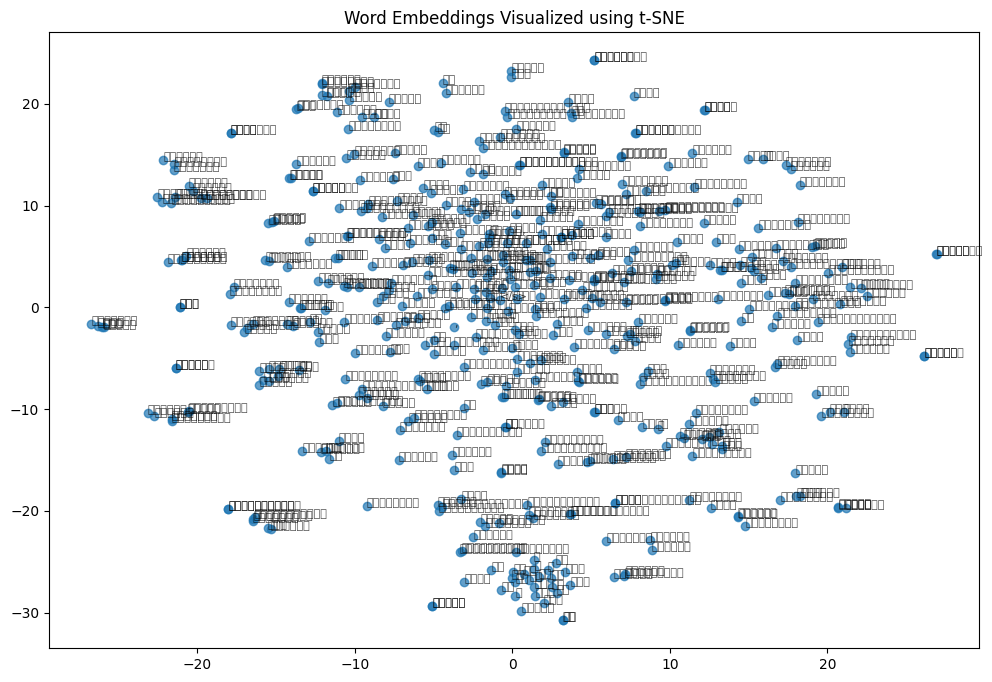

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_vectors = tsne.fit_transform(vectors[:500])  # Use a subset (e.g., first 500 words)

# Plot the reduced embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

# Annotate points with words
for i, word in enumerate(words[:500]):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=8, alpha=0.7)

plt.title("Word Embeddings Visualized using t-SNE")
plt.show()


In [ ]:
pip install tensorboard


In [ ]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1

# Save embeddings in TensorFlow format
out_v = open("vectors.tsv", "w", encoding="utf-8")
out_m = open("metadata.tsv", "w", encoding="utf-8")

for word in words[:500]:  # Use a subset
    vec = model.get_word_vector(word)
    out_v.write("\t".join(map(str, vec)) + "\n")
    out_m.write(word + "\n")

out_v.close()
out_m.close()


In [ ]:
#Summarization

import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
!pip install --upgrade pip setuptools wheel
!pip install fasttext

  Using cached fasttext-0.9.3.tar.gz (73 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313505 sha256=51305587e18c489b6d85895ccbb332a992e7473eafeee81eab2f0d94b4969b6c
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
malayalam_stopwords = [
    "അത്", "അവ", "അവൻ", "അവൾ", "അവരുടെ", "അവൻ്റെ", "അവളുടെ", "അവിടേയ്ക്ക്",
    "അവിടുന്ന്", "അവിടെ", "അവിടേക്കു്", "അവന്റെ", "അവളെ", "അവളോ", "അവൾക്കു്",
    "അവൾക്ക്", "അവൾക്ക്‌", "അവൾക്കും", "അവള്", "അവന്", "അവൻ്റെ", "അവൻ",
    "അവന്‍", "അവന്റെ", "അവളുടെയും", "അവളോടു്", "അവളോട്", "അവളുടെ",
    "അവളെ", "അവളുടെ", "അവസാന", "അവർ", "അവരെ", "അവർക്കു്", "അവർക്കുള്ള",
    "അവർക്കു", "അവർക്കോ", "അവർക്കും", "അവരെയും", "അവരുടേത്", "അവരുടേയും",
    "അവരോടു", "അവരോട്", "അവർക്കോ", "അവർക്കുള്ള", "അവർക്കും", "അവർക്കു",
    "അവരാണോ", "അവരും", "അവരുടേത്", "അവരുടേയും", "അവൻ", "അവന്റെ",
    "അവളുടെ", "അവൾ", "അവളെ", "അവളിൽ", "അവളോ", "അവളേക്കാളും", "അവളോ?",
    "അവളോ!", "അവളോ?", "അവളോ!", "അവളാണോ", "അവളാണു", "അവളാണ്",
    "അവൾക്കും", "അവളുടെ", "അവളേക്കാളും", "അവൾക്കു", "അവൾക്ക്", "അവൾക്ക്‌",
    "അവൾക്കും", "അവൾക്കു", "അവൾക്ക്", "അവൾക്ക്‌", "അവളെ", "അവൾ", "അവളാണ്",
    "അവളാണ്", "അവളുടെ", "അവളിൽ", "അവളാൽ", "അവളാണു", "അവളാണ്",
    "അവളേക്കാളും", "അവള്ക്ക്", "അവള്ക്കു", "അവള്ക്കോ", "അവള്ക്ക്‌", "അവള്ക്കും",
    "അവള്കു", "അവള്കോ", "അവള്ക്‌", "അവള്കും", "അവളാണ്", "അവളാണു",
    "അവള്ക്കു", "അവള്ക്കും", "അവളാണോ", "അവളല്ല", "അവളാണ്", "അവളാകട്ടെ",
    "അവളും", "അവളാണ്", "അവളാണോ", "അവളാണു", "അവള്ക്ക്", "അവള്ക്കു",
    "അവള്ക്ക്‌", "അവള്ക്കും", "അവൾക്കു", "അവൾക്ക്", "അവൾക്കോ", "അവൾക്കും",
    "അവൾക്കു", "അവൾക്കോ", "അവൾക്ക്‌", "അവൾക്കുമാണ്", "അവൾക്കും",
    "അവള്ക്കും", "അവള്ക്കു", "അവള്ക്ക്", "അവള്ക്കും", "അവള്ക്കു", "അവള്ക്ക്",
    "അവൾക്കു", "അവൾക്ക്", "അവൾക്കോ", "അവൾക്കുമാണ്", "അവൾക്കും", "അവള്ക്കും",
    "അവള്ക്കു", "അവള്ക്ക്", "അവള്ക്കും", "അവള്ക്കു", "അവള്ക്ക്", "അവൾക്കു",
    "അവൾക്ക്", "അവൾക്കോ", "അവൾക്കുമാണ്", "അവൾക്കും", "അവള്ക്കും", "അവള്ക്കു",
    "അവള്ക്ക്", "അവള്ക്കും", "അവള്ക്കു", "അവള്ക്ക്"
]


In [ ]:
import fasttext
import numpy as np
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load Malayalam Stopwords (You may need a custom stopword list)
stop_words = set(stopwords.words('english'))  # Replace with Malayalam stopwords if available
# Fix: Initialize nltk_stopwords with stop_words
nltk_stopwords = stop_words.copy()  # Create a copy of stop_words
nltk_stopwords.update(malayalam_stopwords)  # Add Malayalam stopwords

# Load your trained FastText Model
fasttext_model = fasttext.load_model("malayalam_fasttext_model.bin")

def preprocess_text(text):
    """ Tokenizes and removes stopwords """
    sentences = sent_tokenize(text)
    processed_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        words = [word for word in words if word.isalnum() and word not in nltk_stopwords]  # Remove punctuation & stopwords
        processed_sentences.append(words)

    return processed_sentences, sentences  # Return tokenized words and original sentences

def get_sentence_embedding(words):
    """ Computes sentence embedding by averaging word vectors """
    word_vectors = [fasttext_model.get_word_vector(word) for word in words if word in fasttext_model]

    if len(word_vectors) == 0:
        return np.zeros((fasttext_model.get_dimension(),))  # Return zero vector if no words match

    return np.mean(word_vectors, axis=0)  # Average word vectors

def summarize_text(text, summary_ratio=0.3):
    """ Generates an extractive summary using FastText sentence embeddings """
    processed_sentences, original_sentences = preprocess_text(text)

    # Compute embeddings for each sentence
    sentence_embeddings = np.array([get_sentence_embedding(words) for words in processed_sentences])

    # Compute pairwise similarity scores
    similarity_matrix = cosine_similarity(sentence_embeddings)
    sentence_scores = similarity_matrix.sum(axis=1)  # Sum similarities for ranking

    # Select top-ranked sentences
    num_sentences = max(1, int(len(original_sentences) * summary_ratio))  # Ensure at least 1 sentence in summary
    top_sentence_indices = np.argsort(sentence_scores)[-num_sentences:]  # Get indices of top sentences

    # Sort sentences in original order
    top_sentence_indices.sort()
    summary = " ".join([original_sentences[i] for i in top_sentence_indices])

    return summary

# Example Malayalam Text
text = """
ഇന്ത്യ ഒരു മതേതര രാഷ്ട്രമാണ്. ഇവിടെ വിവിധ മതങ്ങൾ, ഭാഷകൾ, സാംസ്കാരിക പൈതൃകങ്ങൾ ഒത്തുചേരുന്നു.
വിദ്യാഭ്യാസം ഒരു രാജ്യത്തിന്റെ വളർച്ചയ്ക്ക് അടിസ്ഥാനമാണ്. എത്ര കൂടുതൽ ജനങ്ങൾ പഠിച്ചാൽ,
രാജ്യത്തിന്റെ സമ്പത്ത് വളരും. നമ്മുടെ വിദ്യാഭ്യാസ വ്യവസ്ഥ ശക്തമാകണം.
"""

# Generate Summary
summary = summarize_text(text, summary_ratio=0.4)
print("Original Text:\n", text)
print("\nSummarized Text:\n", summary)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


MemoryError: std::bad_alloc

In [ ]:
import fasttext

# Load trained FastText model
model = fasttext.load_model("malayalam_fasttext_model.bin")


In [ ]:
emotion_words = {
    "happy": ["സന്തോഷം", "ആനന്ദം", "പ്രശാന്തി", "ഹർഷം", "ഉത്സാഹം"],
    "sad": ["ദുഃഖം", "വേദന", "തളർച്ച", "വ്യസനം", "നിരാശ"],
    "fear": ["ഭയം", "അസുരക്ഷ", "ഉറക്കമില്ല", "കുലുങ്ങൽ", "അസ്ഥിരത"],
    "anger": ["കോപം", "വിഷമം", "വൈരാഗ്യം", "അക്രമം", "വൃത്തികെട്ട"],
    "disgust": ["അറിയപ്പെടാത്ത", "വിമുഖത", "വികാരം", "അസഹിഷ്ണുത", "അപരാധബോധം"],
    "neutral": ["നിഷ്പക്ഷം", "സാധാരണ", "മധ്യസ്ഥം", "അറിയില്ല", "തലക്കേടില്ല"],
    "shame": ["ലജ്ജ", "അപകീർത്തി", "അസുഖം", "നാണം", "അപമാനം"],
    "surprise": ["ആശ്ചര്യം", "വിശേഷം", "അനുഭവം", "അപ്രതീക്ഷിതം", "വിസ്മയം"]
}


In [ ]:
import numpy as np

# Convert emotion words to vectors
emotion_vectors = {
    emotion: np.array([model.get_word_vector(word) for word in words if word in model.words])
    for emotion, words in emotion_words.items()
}


In [ ]:
def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.get_word_vector(word) for word in words if word in model.words]

    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Averaging word vectors
    else:
        return np.zeros(model.get_dimension())  # Return zero vector if no words found


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def predict_emotion(sentence, model, emotion_vectors):
    sentence_vector = get_sentence_vector(sentence, model).reshape(1, -1)

    # Compute similarity with each emotion category
    similarities = {
        emotion: np.mean(cosine_similarity(sentence_vector, vectors))
        for emotion, vectors in emotion_vectors.items()
    }

    # Assign the emotion with the highest similarity
    predicted_emotion = max(similarities, key=similarities.get)

    return predicted_emotion, similarities


In [ ]:
test_sentences = [
    "ഞാൻ ഇന്ന് വളരെ സന്തോഷവാനാണ്!",  # Happy
    "ഞാൻ വളരെ ഭയന്നുപോയി!",  # Fear
    "ഈ സംഭവം ഞെട്ടിച്ചുപോയി!",  # Surprise
    "ഇത് എന്റെ ജീവിതത്തിലെ ഏറ്റവും മോശം അനുഭവം!",  # Sad
]

for sentence in test_sentences:
    emotion, scores = predict_emotion(sentence, model, emotion_vectors)
    print(f"Sentence: {sentence}")
    print(f"Predicted Emotion: {emotion}")
    print(f"Scores: {scores}\n")


In [ ]:
#new sentiment
import fasttext
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

 # Load the trained FastText model
fasttext_model = fasttext.load_model("malayalam_fasttext_model2.bin")

# Define word embedding dimension
embedding_dim = fasttext_model.get_dimension()
print(f"Loaded FastText model with embedding size: {embedding_dim}")

#sentences and labels
sentences=[]
labels=[]





label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print(f"Number of sentences: {len(sentences)}")
print(f"Number of labels: {len(labels)}")
print(f"Number of encoded labels: {len(labels_encoded)}")

# Split data into training and testing sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels_encoded, test_size=0.2, random_state=42)


# Tokenize words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences)

# Convert sentences to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to a fixed length
max_length = max(len(seq) for seq in train_sequences)  # Find max sentence length
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')


# Create embedding matrix for FastText
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
    if word in fasttext_model.get_words():  # Check if word exists in FastText
        embedding_matrix[index] = fasttext_model.get_word_vector(word)

print(f"Embedding matrix shape: {embedding_matrix.shape}")

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
    SpatialDropout1D(0.2),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the LSTM model
history = model.fit(train_padded, train_labels, epochs=10, batch_size=8, validation_data=(test_padded, test_labels))


# Evaluate on test data
loss, accuracy = model.evaluate(test_padded, test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict emotions for new sentences
new_sentences = [
    "ഇന്ന് വളരെ സന്തോഷം തോന്നുന്നു!",  # Happy
    "ഞാൻ വളരെ നിരാശയിലാണ്.",  # Sad
    "ഇത് അത്യന്തം ഭയപ്പെടുത്തുന്നതാണ്!",  # Fear
]

# Convert to sequences
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Predict
predictions = model.predict(new_padded)
predicted_labels = [label_encoder.classes_[np.argmax(pred)] for pred in predictions]

# Print results
for sentence, label in zip(new_sentences, predicted_labels):
    print(f"Sentence: {sentence}")
    print(f"Predicted Emotion: {label}\n")

In [ ]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet("test.parquet", engine="pyarrow")

# Save as a plain text file (tab-separated)
df.to_csv("test_data.txt", sep="\t", index=False)


In [ ]:
#modified sentiment analysis
!pip install fasttext

import fasttext
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the trained FastText model
fasttext_model = fasttext.load_model("malayalam_fasttext_model.bin")

# Define word embedding dimension
embedding_dim = fasttext_model.get_dimension()
print(f"Loaded FastText model with embedding size: {embedding_dim}")

# Load and parse the text file
sentences = []
labels = []

with open("sentiment_data.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().rsplit("\t", 1)  # Split by tab
        if len(parts) == 2:
            sentences.append(parts[0])
            labels.append(parts[1].strip().lower())  # Normalize labels

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

print(f"Number of sentences: {len(sentences)}")
print(f"Number of labels: {len(labels)}")

# Split data into training and testing sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels_encoded, test_size=0.2, random_state=42)

# Tokenize words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences)

# Convert sentences to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to a fixed length
max_length = max(len(seq) for seq in train_sequences)  # Find max sentence length
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Create embedding matrix for FastText
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, index in tokenizer.word_index.items():
    if word in fasttext_model.get_words():  # Check if word exists in FastText
        embedding_matrix[index] = fasttext_model.get_word_vector(word)

print(f"Embedding matrix shape: {embedding_matrix.shape}")

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False),
    SpatialDropout1D(0.2),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
history = model.fit(train_padded, train_labels, epochs=10, batch_size=8, validation_data=(test_padded, test_labels))

# Evaluate on test data
loss, accuracy = model.evaluate(test_padded, test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict emotions for new sentences
new_sentences = [
    "ഇന്ന് വളരെ സന്തോഷം തോന്നുന്നു!",  # Happy
    "ഞാൻ വളരെ നിരാശയിലാണ്.",  # Sad
    "ഇത് അത്യന്തം ഭയപ്പെടുത്തുന്നതാണ്!",  # Fear
]

# Convert to sequences
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Predict
predictions = model.predict(new_padded)
predicted_labels = [label_encoder.classes_[np.argmax(pred)] for pred in predictions]

# Print results
for sentence, label in zip(new_sentences, predicted_labels):
    print(f"Sentence: {sentence}")
    print(f"Predicted Emotion: {label}\n")


MemoryError: std::bad_alloc